In [6]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [7]:
max_features = 20000
max_len = 50
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

pad_size_dict = {}
for max_len in [20, 50, 100, 200, 400]:
    x_train = pad_sequences(x_train, maxlen=max_len)
    x_test = pad_sequences(x_test, maxlen=max_len)
    pad_size_dict[max_len] = (x_train, x_test)

In [8]:
model_layers_dict = {}
for k, v in pad_size_dict.items():
    model_layers_dict[k] = [
        Embedding(max_features, 32),
        SimpleRNN(32, input_shape=(max_features,k)),
        Dropout(0.1),
        Dense(1, activation='sigmoid'),
    ]

models = {}

for k, v in model_layers_dict.items():
    model = Sequential(v)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    models[k] = model
    print(k)
    model.summary()

20
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          640000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 642,113
Trainable params: 642,113
Non-trainable params: 0
_________________________________________________________________
50
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedd

In [9]:
history_dict = {}
for k, model in tqdm(models.items()):
    x_train, x_test = pad_size_dict[k]
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_test, y_test))
    history_dict[k] = history

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/3
782/782 [==============================] - 8s 9ms/step - loss: 0.5480 - accuracy: 0.7090 - val_loss: 0.4913 - val_accuracy: 0.7605
Epoch 2/3
782/782 [==============================] - 7s 8ms/step - loss: 0.3560 - accuracy: 0.8462 - val_loss: 0.5255 - val_accuracy: 0.7534
Epoch 3/3
782/782 [==============================] - 7s 9ms/step - loss: 0.1732 - accuracy: 0.9351 - val_loss: 0.6819 - val_accuracy: 0.7283


 20%|██        | 1/5 [00:21<01:25, 21.40s/it]

Epoch 1/3
782/782 [==============================] - 11s 14ms/step - loss: 0.5546 - accuracy: 0.7041 - val_loss: 0.4875 - val_accuracy: 0.7644
Epoch 2/3
782/782 [==============================] - 11s 14ms/step - loss: 0.3504 - accuracy: 0.8499 - val_loss: 0.5286 - val_accuracy: 0.7522
Epoch 3/3
782/782 [==============================] - 11s 15ms/step - loss: 0.1586 - accuracy: 0.9440 - val_loss: 0.7093 - val_accuracy: 0.7248


 40%|████      | 2/5 [00:55<01:25, 28.64s/it]

Epoch 1/3
782/782 [==============================] - 16s 20ms/step - loss: 0.5810 - accuracy: 0.6723 - val_loss: 0.4992 - val_accuracy: 0.7586
Epoch 2/3
782/782 [==============================] - 16s 20ms/step - loss: 0.3648 - accuracy: 0.8404 - val_loss: 0.5406 - val_accuracy: 0.7325
Epoch 3/3
782/782 [==============================] - 16s 21ms/step - loss: 0.1723 - accuracy: 0.9372 - val_loss: 0.6883 - val_accuracy: 0.7252


 60%|██████    | 3/5 [01:43<01:15, 37.53s/it]

Epoch 1/3
782/782 [==============================] - 25s 31ms/step - loss: 0.5718 - accuracy: 0.6828 - val_loss: 0.5172 - val_accuracy: 0.7415
Epoch 2/3
782/782 [==============================] - 23s 30ms/step - loss: 0.3720 - accuracy: 0.8378 - val_loss: 0.5306 - val_accuracy: 0.7451
Epoch 3/3
782/782 [==============================] - 23s 30ms/step - loss: 0.1793 - accuracy: 0.9346 - val_loss: 0.6738 - val_accuracy: 0.7301


 80%|████████  | 4/5 [02:54<00:50, 50.88s/it]

Epoch 1/3
782/782 [==============================] - 43s 54ms/step - loss: 0.5809 - accuracy: 0.6687 - val_loss: 0.5072 - val_accuracy: 0.7517
Epoch 2/3
782/782 [==============================] - 42s 54ms/step - loss: 0.4267 - accuracy: 0.8022 - val_loss: 0.5230 - val_accuracy: 0.7354
Epoch 3/3
782/782 [==============================] - 42s 54ms/step - loss: 0.2841 - accuracy: 0.8839 - val_loss: 0.6094 - val_accuracy: 0.7355


100%|██████████| 5/5 [05:02<00:00, 60.54s/it]


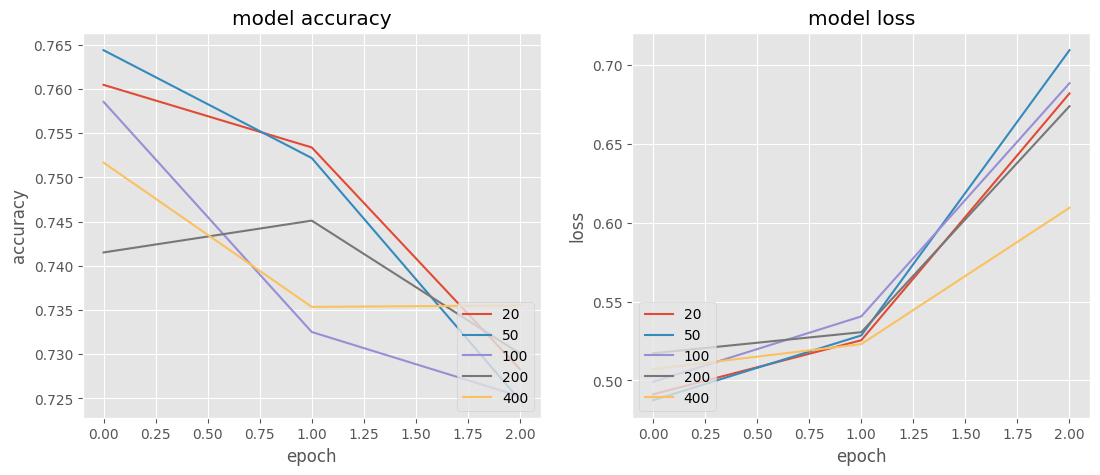

In [10]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

for k, history in history_dict.items():
    plt.sca(axis[0])
    plt.plot(history.history['val_accuracy'], label=k)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')

    plt.sca(axis[1])
    plt.plot(history.history['val_loss'], label=k)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
plt.savefig(f'plots/'+ " ".join([str(x) for x in models.keys()]) + '.png');